# Friendship Paradox Biases Perceptions in Directed Networks
### This notebook is experimental results of [this paper](https://arxiv.org/pdf/1905.05286.pdf).

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from collections import Counter


plt.style.use('ggplot')
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = False
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = 22

# 2.1 Four Variants of the Friendship Paradox in Directed Networks

### Preprocessing

In [3]:
# Reading list of nodes - for seed users - 
seed_users = pd.read_csv("Data/Seed_users.csv")
print ("Number of seed users = {}".format(len(seed_users)))

# Reading list of edges for seed users subgraph 
all_edges = pd.read_csv("Data/User_graph.csv")
edges = all_edges[all_edges['from'].isin(seed_users['user_id']) & all_edges['to'].isin(seed_users['user_id'])]
print ("Number of edges in seed subgraph = {}".format(len(edges)))

Number of seed users = 5599
Number of edges in seed subgraph = 691771


In [4]:
# Processing in-degree and out-degree of all seed nodes 
seed_out_deg = edges.groupby(['to']).size().to_dict()
seed_in_deg = edges.groupby(['from']).size().to_dict()

for usr in seed_users['user_id']:
    if usr not in seed_in_deg:
        seed_in_deg[usr] = 0
    if usr not in seed_out_deg:
        seed_out_deg[usr] = 0

# Joining in-degree and out-degree to edges dataframe 
pd.options.mode.chained_assignment = None
edges['follower_in_deg'] = edges['from'].map(seed_in_deg)
edges['follower_out_deg'] = edges['from'].map(seed_out_deg)
edges['friend_in_deg'] = edges['to'].map(seed_in_deg)
edges['friend_out_deg'] = edges['to'].map(seed_out_deg)

# Counting number of occurrences of 4 types of Friendship Paradox
friends_have_more_followers = edges[edges['friend_out_deg'] > edges['follower_out_deg']].groupby(['follower_in_deg']).size().to_dict()
friends_have_more_friends = edges[edges['friend_in_deg'] > edges['follower_in_deg']].groupby(['follower_in_deg']).size().to_dict()
followers_have_more_followers = edges[edges['follower_out_deg'] > edges['friend_out_deg']].groupby(['friend_out_deg']).size().to_dict()
followers_have_more_friends = edges[edges['follower_in_deg'] > edges['friend_in_deg']].groupby(['friend_out_deg']).size().to_dict()

# Counting the *possible* number of occurrences of 4 types Friendship Paradox
seed_out_deg_outof = dict(Counter(seed_out_deg.values()))
seed_in_deg_outof = dict(Counter(seed_in_deg.values()))

for k, v in seed_out_deg_outof.items():
    seed_out_deg_outof[k] = k * v
    
for k, v in seed_in_deg_outof.items():
    seed_in_deg_outof[k] = k * v


### Plots

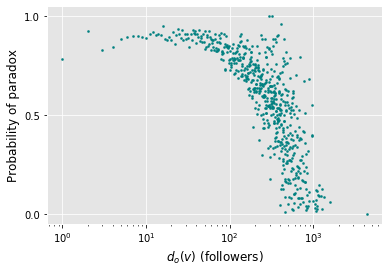

In [5]:
X = sorted(friends_have_more_followers.keys())
Y = [float(friends_have_more_followers[el]) / float(seed_in_deg_outof[el]) for el in X]
plt.scatter(X, Y, s = 4, color='teal')
plt.ylabel("Probability of paradox")
plt.xlabel("$d_o(v)$ (followers)")
plt.xscale('log')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([-0.05, 1.05])
#plt.title("Friends have more followers")
plt.savefig("Plots/friends_have_more_followers.pdf", bbox_inches='tight')
plt.show()

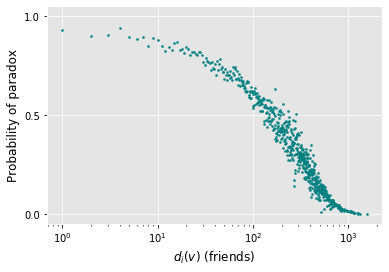

In [6]:
X = sorted(friends_have_more_friends.keys())
Y = [float(friends_have_more_friends[el]) / float(seed_in_deg_outof[el]) for el in X]
plt.scatter(X, Y, s = 4, color='teal')
plt.ylabel("Probability of paradox")
plt.xlabel("$d_i(v)$ (friends)")
plt.xscale('log')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([-0.05, 1.05])
#plt.title("Friends have more friends")
plt.savefig("Plots/friends_have_more_friends.pdf", bbox_inches='tight')
plt.show()

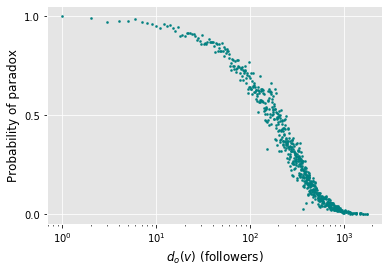

In [7]:
X = sorted(followers_have_more_followers.keys())
Y = [float(followers_have_more_followers[el]) / float(seed_out_deg_outof[el]) for el in X]
plt.scatter(X, Y, s = 4, color='teal')
plt.ylabel("Probability of paradox")
plt.xlabel("$d_o(v)$ (followers)")
plt.xscale('log')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([-0.05, 1.05])
#plt.title("Followers have more followers")
plt.savefig("Plots/followers_have_more_followers.pdf", bbox_inches='tight')
plt.show()

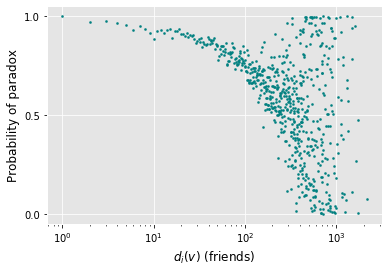

In [8]:
X = sorted(followers_have_more_friends.keys())
Y = [float(followers_have_more_friends[el]) / float(seed_out_deg_outof[el]) for el in X]
plt.scatter(X, Y, s = 4, color='teal')
plt.ylabel("Probability of paradox")
plt.xlabel("$d_i(v)$ (friends)")
plt.xscale('log')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim([-0.05, 1.05])
#plt.title("Followers have more friends")
plt.savefig("Plots/followers_have_more_friends.pdf", bbox_inches='tight')
plt.show()

# 2.2 Perception Biases in Directed Networks

### Preprocessing

In [9]:
# Reading actions (tweets & retweets) of important hashtags
actions = pd.read_csv("Data/actions.csv")
actions = actions.sort_values('time')
actions = actions.drop_duplicates(['user', 'hashtag'], keep='first')
print ("# of actions = {}".format(len(actions)))

important_hashtags = list(set(actions['hashtag']))
print ("# of important hashtags = {}".format(len(important_hashtags)))

# Grouping actions by hashtags to have list of users who used the hashtag
actions_gr = actions.groupby('hashtag')['user'].apply(list)

# Reading the network and computing in-degree and out-degree of nodes 
graph = pd.read_csv("Data/User_graph.csv")
all_users = list(set(graph['from']).union(set(graph['to'])))
print ("# of users = {}".format(len(all_users)))

in_deg = graph.groupby('from').size().to_dict()
print ("len(in_deg) = {}".format(len(in_deg)))

out_deg = graph.groupby('to').size().to_dict()
for ind, usr in enumerate(all_users):
    if usr not in out_deg:
        out_deg[usr] = 0
print ("len(out_deg) = {}".format(len(out_deg)))

# of actions = 3195273
# of important hashtags = 1153
# of users = 677411
len(in_deg) = 5569
len(out_deg) = 677411


In [10]:
# Input: list of users who used a hashtag
# Output: E{f(X)}, E{f(Y)} and Q_f(v) for all v in nodes
def get_perceptions(list_of_users):
    list_of_users = set(list_of_users).intersection(all_users)
    expected_fx = float(len(list_of_users)) / float(len(all_users))
    
    num_followers = list(graph.loc[graph['to'].isin(list_of_users)]['from'])  
    expected_fy = float(len(num_followers)) / float(len(graph))
    
    saw_hashtag = dict(Counter(list(graph.loc[graph['to'].isin(list_of_users)]['from'])))
    q_f_nodes = dict()
    for usr, time in saw_hashtag.items():
        q_f_nodes[usr] = float(time) / float(in_deg[usr])
    
    return expected_fx, expected_fy, q_f_nodes

# Computing local_bias, and global_bias for all hashtags
local_bias = dict()
global_bias = dict()

expected_fx = dict()
expected_fy = dict()
q_f_nodes = dict()
expected_q_f_nodes = dict()

for hsh in important_hashtags:
    print (hsh, end = ' ')
    usrs_used_hashtag = actions_gr[hsh]
    expected_fx[hsh], expected_fy[hsh], q_f_nodes[hsh] = get_perceptions(usrs_used_hashtag)
    
    expected_q_f_nodes[hsh] = sum(q_f_nodes[hsh].values()) / len(in_deg)
    local_bias[hsh] = expected_q_f_nodes[hsh] - expected_fx[hsh]
    global_bias[hsh] = expected_fy[hsh] - expected_fx[hsh]


th iwd2014 beauty website le ntchat internet missing suarez portland teaparty mtvhottest children dc prayforgaza afp bears digitalmarketing batman thewalkingdead ne hair dataviz yolo gohawks hero security satchat scandal f4f restaurant ch breaking lfc funny food writer author worldcup2014 selfie capricorn sochi data peace photo community throwbackthursday colombia hiphop itunes lightsout streetart us baby monday adopt libya indyref anonymous pdx bravsger worldseries obama icebucketchallenge europe hiring california eu christian artists egypt spain bbloggers mikebrown training students digitalhealth help gamedev journalism f fall climatechange s quotes halloween car sleep entrepreneur ux bi hotel marketing highered yvr yes truth motivationmonday nra vc pbl repost supermoon vegan cooking seattle baseball photos amazing oscars2014 adventure ga gervsarg design volunteer grateful hamas kids ita twitter strategy usavsbel scorpio tr google italy followback movies wildlife travel sf gre ny nyf

8 crm infographic economy thriller gratitude architecture smile marvel didyouknow soccer breakingbad france war de sandy mlb n wow ma change rip y superbowl commoncore health amazoncart houston yankees sec ya emmy sexy apps tgif event turkey rock hunger ocean 5 inspiration math bellletstalk thingstimhowardcouldsave soundcloud arts islam podcast allin wearables k humantrafficking ibm yoga engchat faceofmlb ukedchat tax bra cdnpoli water livemusic england vintage college marriageequality autism bullying romance wef proud ipaded thevoice whiff tea bds canada dubai budget2014 iartg career raisethewage 1 

In [11]:
# Input: hashtag
# Output: perception of individuals of the network about the hashtag
def get_individual_local_bias(hsh):
    hsh_local_bias = []
    for usr, ind in in_deg.items():
        tmp = -1 * expected_fx[hsh]
        if usr in q_f_nodes[hsh]:
            tmp += q_f_nodes[hsh][usr]
        hsh_local_bias.append(tmp)
    return hsh_local_bias

# Aggregating perceptions of all individuals for all hashtags
all_individual_local_bias = []
for hsh in important_hashtags:
    all_individual_local_bias.extend(get_individual_local_bias(hsh))

In [12]:
# Extracting the ranking of hashtags based on local bias
local_bias_ranking = sorted(local_bias.items(), key=lambda k:k[1], reverse=True)

rank_hashtag_local_bias = []
rank_local_prevalance = []
rank_global_prevalance = []

# Top-20
for ind in range(20):
    rank_hashtag_local_bias.append(local_bias_ranking[ind][0])
    rank_local_prevalance.append(expected_fx[local_bias_ranking[ind][0]] + local_bias_ranking[ind][1])
    rank_global_prevalance.append(expected_fx[local_bias_ranking[ind][0]])
    
rank_hashtag_local_bias.append('...')
rank_local_prevalance.append(0)
rank_global_prevalance.append(0)

# Last-10
for ind in range(10):
    rind = len(local_bias_ranking) - 10 + ind
    rank_hashtag_local_bias.append(local_bias_ranking[rind][0])
    rank_local_prevalance.append(expected_fx[local_bias_ranking[rind][0]] + local_bias_ranking[rind][1])
    rank_global_prevalance.append(expected_fx[local_bias_ranking[rind][0]])


### Plots

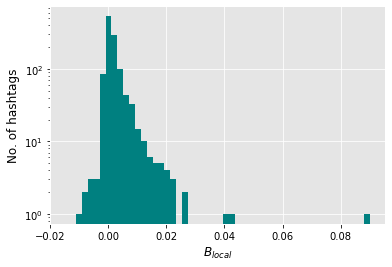

In [13]:
plt.hist(local_bias.values(), bins=50, color='teal')
plt.yscale('log')
plt.ylabel("No. of hashtags")
plt.xlabel("$B_{local}$")
plt.xticks([-0.02, 0.0, 0.02, 0.04, 0.06, 0.08])
plt.savefig("Plots/local_bias_histogram.pdf", bbox_inches='tight')
plt.show()

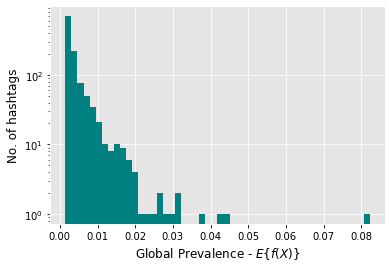

In [14]:
plt.clf()
plt.hist(expected_fx.values(), bins=50, color='teal')
plt.yscale('log')
plt.ylabel("No. of hashtags")
plt.xlabel("Global Prevalence - $E\{f(X)\}$")
plt.savefig("Plots/expected_fx_histogram.pdf", bbox_inches='tight')
plt.show()

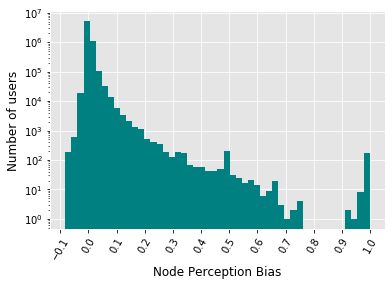

In [15]:
plt.clf()

plt.hist(all_individual_local_bias, bins=50, color='teal')

plt.yscale('log')
plt.ylabel("Number of users")
plt.xlabel("Node Perception Bias")
plt.xticks(np.arange(-0.1, 1.01, 0.1), rotation=60)
plt.savefig("Plots/individual_local_bias.pdf", bbox_inches='tight')
plt.show()

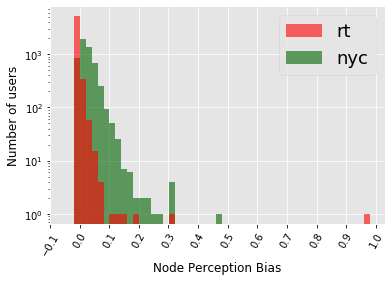

In [16]:
plt.clf()

_, bins, _ = plt.hist(get_individual_local_bias('rt'), bins=50, color='red', label='rt', alpha=0.6, zorder=2)
plt.hist(get_individual_local_bias('nyc'), bins=bins, color='darkgreen', label='nyc', alpha=0.6, zorder=1)

plt.yscale('log')
plt.ylabel("Number of users")
plt.xlabel("Node Perception Bias")
plt.xticks(np.arange(-0.1, 1.01, 0.1), rotation=60)
plt.legend(prop={'size': 18})
plt.savefig("Plots/compare_nyc_rt.pdf", bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

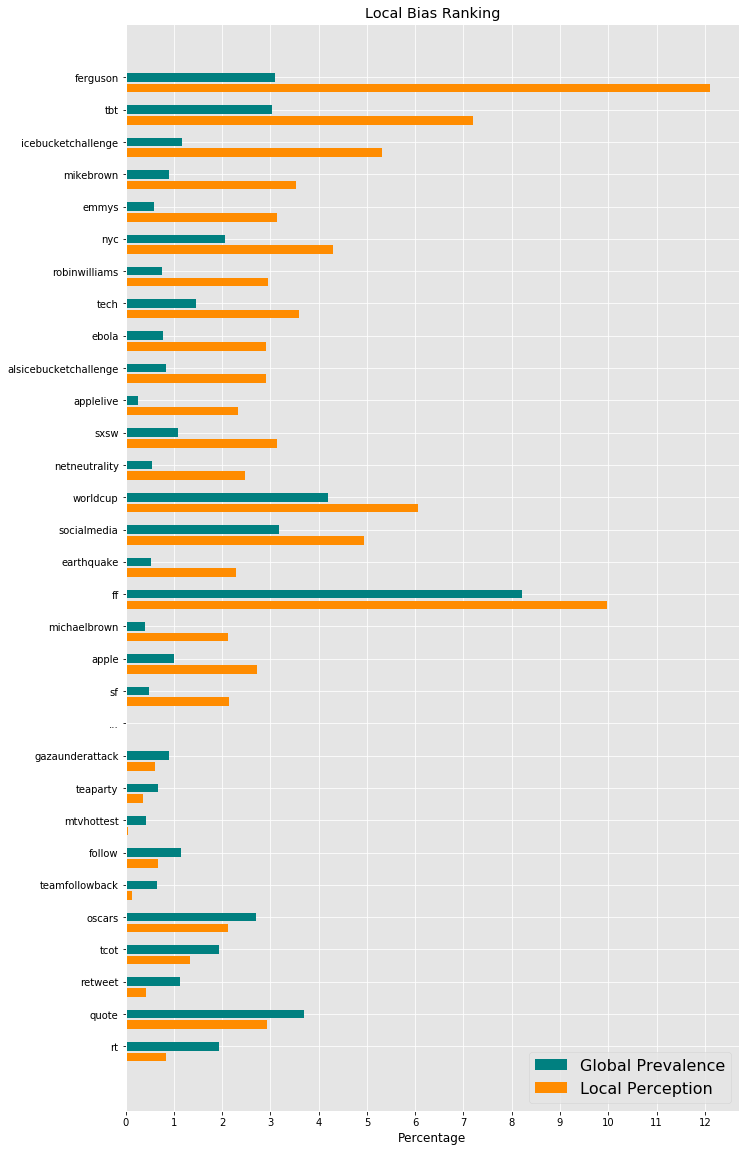

In [17]:
plt.clf()
fig, ax = plt.subplots()

y_pos_local = np.arange(1, 3 * len(rank_hashtag_local_bias) + 1, 3)
y_pos_global = y_pos_local - 1.0

ax.barh(y_pos_global, rank_global_prevalance, align='center', color='teal', ecolor='black', label='Global Prevalence')
ax.barh(y_pos_local, rank_local_prevalance, align='center', color='darkorange', ecolor='black', label='Local Perception')

ax.set_yticks(y_pos_global)
ax.set_xticks(np.arange(0, 0.13, 0.01))

ax.set_yticklabels(rank_hashtag_local_bias)
ax.set_xticklabels(np.arange(0, 13, 1))
ax.set_xlabel('Percentage')

ax.invert_yaxis()

ax.set_title('Local Bias Ranking')
fig.set_size_inches(11,20)
plt.legend(loc=4, prop={'size': 16})
plt.savefig('Plots/local_bias_ranking.pdf', bbox_inches='tight')
plt.show()

# 2.3 Estimating Global Prevalence via Polling

### Preprocessing

In [3]:
pos_deg_graph = pd.read_csv("Data/User_graph.csv")
pos_deg_nodes = list(set(pos_deg_graph['from']).intersection(set(pos_deg_graph['to'])))

while len(pos_deg_nodes) > 0:
    pos_deg_graph = pos_deg_graph.loc[(pos_deg_graph['from'].isin(pos_deg_nodes)) & (pos_deg_graph['to'].isin(pos_deg_nodes))]
    remained_nodes = list(set(pos_deg_graph['from']).intersection(set(pos_deg_graph['to'])))
    
    if len(remained_nodes) < len(pos_deg_nodes):
        pos_deg_nodes = remained_nodes
    else:
        break
pos_deg_nodes = np.array(pos_deg_nodes)
print ("Number of remained nodes = {}".format(len(pos_deg_nodes)))
print ("Number of remained edges = {}".format(len(pos_deg_graph)))


actions = pd.read_csv("Data/action_hashtag.csv")
actions = actions.loc[actions['user'].isin(pos_deg_nodes)]
actions = actions.drop_duplicates(['user', 'hashtag'])
actions = actions[actions.groupby('hashtag').user.transform(len) > 56] # 1 percent of the network
important_hashtags = list(set(actions['hashtag']))
print ("Number of important hashtags = {}".format(len(important_hashtags)))

actions_gr = actions.groupby('hashtag')['user'].apply(list)
print ("Number of actions-hashtags = {}".format(len(actions_gr)))

Number of remained nodes = 5409
Number of remained edges = 678625
Number of important hashtags = 503
Number of actions-hashtags = 503


In [5]:
pos_deg_outdeg = pos_deg_graph.groupby(['to']).size().to_dict()
pos_deg_indeg = pos_deg_graph.groupby(['from']).size().to_dict()

In [6]:
qf = dict()
efx = dict()
for hsh in important_hashtags:
    print (hsh, end = ' ')
    efx[hsh] = float(len(set(actions_gr[hsh]))) / float(len(pos_deg_nodes))
    qf[hsh] = dict()
    for usr in pos_deg_nodes:
        neighs = list(pos_deg_graph.loc[pos_deg_graph['from'] == usr]['to'])
        neigh_count = len(set(actions_gr[hsh]).intersection(set(neighs)))
        qf[hsh][usr] = float(neigh_count) / float(pos_deg_indeg[usr])

advertising ff ned f followfriday truth internetslowdown usopen weekend custserv mothersday twitterversary storify music startrek socbiz nonprofit drought latergram kindle meatlessmonday nutrition linkedin sharkweek leadership syria vegan parenting nofilter politics ebola ccss ger dodgers nsa happiness ios8 news ecommerce soccer android india science client breakfast in sf streetart productivity russia usavsbel nmos14 hcsm money wow football excited quote teachers pandora t reading sfgiants losangeles sad architecture workout ad iwatch apple millennials fathersday toronto c brazil data m napa cooking justsayin fun respect youtube cancer iftheygunnedmedown firstworldproblems laborday 3 startup mexico community inspiration got cloud siliconvalley fashion g esurancesave30 rip 49ers oakland dog sdcc robinwilliams travel inbound14 scotland inspiring mikebrown snowden books blogust sharknado2 hashtag lego riprobinwilliams emmys2014 art yesallwomen wedding craftbeer obamacare d ttot alsicebuc

In [7]:
def mean_std_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, np.var(a), h

itr_times = 200
def get_IP(hsh, b):
    estimates = []
    for itr in range(itr_times):
        chosen_idx = np.random.choice(len(pos_deg_nodes), replace=True, size=b) 
        s = np.array(pos_deg_nodes)[chosen_idx]
        estimate = sum(np.in1d(s, actions_gr[hsh])) / float(b)
        estimates.append(estimate)
    return mean_std_confidence_interval(estimates)

def get_NPP(hsh, b):
    estimates = []
    for itr in range(itr_times):
        chosen_idx = np.random.choice(len(pos_deg_nodes), replace=True, size=b)
        s = np.array(pos_deg_nodes)[chosen_idx]
        estimate = 0.0
        for v in s:
            estimate += qf[hsh][v]
        estimate = float(estimate) / float(b)
        estimates.append(estimate)
    return mean_std_confidence_interval(estimates)

def get_FPP(hsh, b):
    estimates = []
    for itr in range(itr_times):
        chosen_idx = np.random.choice(len(pos_deg_graph), replace=True, size=b)
        s = np.array(pos_deg_graph.iloc[chosen_idx]['from'])
        estimate = 0.0
        for v in s:
            estimate += qf[hsh][v]
        estimate = float(estimate) / float(b)
        estimates.append(estimate)
    return mean_std_confidence_interval(estimates)


In [27]:
b = 25 

IP_bias, IP_var = {}, {}
NPP_bias, NPP_var = {}, {}
FPP_bias, FPP_var = {}, {}

for hsh in important_hashtags:
    print (hsh, end = ' ')
    m, v, c = get_IP(hsh, b)
    IP_bias[hsh], IP_var[hsh] = m - efx[hsh], v
    
    m, v, c = get_NPP(hsh, b)
    NPP_bias[hsh], NPP_var[hsh] = m - efx[hsh], v
    
    m, v, c = get_FPP(hsh, b)
    FPP_bias[hsh], FPP_var[hsh] = m - efx[hsh], v
    

advertising ff ned f followfriday truth internetslowdown usopen weekend custserv mothersday twitterversary storify music startrek socbiz nonprofit drought latergram kindle meatlessmonday nutrition linkedin sharkweek leadership syria vegan parenting nofilter politics ebola ccss ger dodgers nsa happiness ios8 news ecommerce soccer android india science client breakfast in sf streetart productivity russia usavsbel nmos14 hcsm money wow football excited quote teachers pandora t reading sfgiants losangeles sad architecture workout ad iwatch apple millennials fathersday toronto c brazil data m napa cooking justsayin fun respect youtube cancer iftheygunnedmedown firstworldproblems laborday 3 startup mexico community inspiration got cloud siliconvalley fashion g esurancesave30 rip 49ers oakland dog sdcc robinwilliams travel inbound14 scotland inspiring mikebrown snowden books blogust sharknado2 hashtag lego riprobinwilliams emmys2014 art yesallwomen wedding craftbeer obamacare d ttot alsicebuc

In [33]:
worse_than_NPP = dict()
worse_than_IP = dict()
for b in range(10, 260, 5):
    print (b, end = ' ')
    worse_than_NPP[b] = []
    worse_than_IP[b] = []
    for hsh in important_hashtags:
        m0, v0, _ = get_IP(hsh, b)
        m1, v1, _ = get_NPP(hsh, b)
        m2, v2, _ = get_FPP(hsh, b)
        
        if (v0 + (m0 - efx[hsh])**2) < (v2 + (m2 - efx[hsh])**2):
            worse_than_IP[b].append(hsh)
        if (v1 + (m1 - efx[hsh])**2) < (v2 + (m2 - efx[hsh])**2):
            worse_than_NPP[b].append(hsh)
    
    print (len(worse_than_IP[b]), len(worse_than_NPP[b]))

10 0 70
15 0 86
20 2 98
25 3 110
30 3 121
35 5 123
40 8 129
45 9 140
50 13 144
55 13 147
60 18 156
65 19 158
70 25 165
75 25 165
80 32 170
85 36 172
90 36 180
95 36 186
100 40 184
105 44 183
110 45 188
115 47 191
120 47 194
125 48 191
130 51 197
135 53 196
140 53 201
145 57 200
150 57 205
155 62 205
160 62 208
165 68 205
170 72 208
175 71 209
180 70 209
185 72 212
190 81 210
195 78 213
200 79 213
205 79 212
210 87 216
215 86 216
220 88 215
225 89 218
230 89 218
235 93 219
240 93 220
245 95 220
250 96 220
255 97 221


### Plots

In [29]:
X = [el[0] for el in sorted(efx.items())]

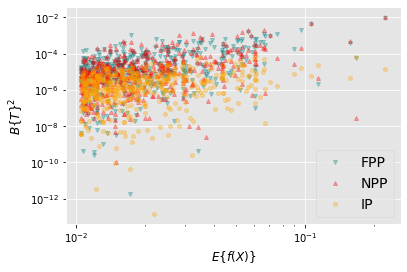

In [30]:
plt.clf()
plt.errorbar([efx[x] for x in X], [FPP_bias[x]**2 for x in X], linestyle='', marker='v', markersize=4, color='teal', label='FPP', alpha=0.3)
plt.errorbar([efx[x] for x in X], [NPP_bias[x]**2 for x in X], linestyle='', marker='^', markersize=4, color='red', label='NPP', alpha=0.3)
plt.errorbar([efx[x] for x in X], [IP_bias[x]**2 for x in X], linestyle='', marker='o', markersize=4, color='orange', label='IP', alpha=0.3)

plt.xlabel("$E\{f(X)\}$")
plt.ylabel("$B\{T\}^2$")
#plt.yscale('symlog', linthreshy=0.000001)
plt.yscale('log')
plt.xscale('log')
plt.legend(prop={'size': 14})
#plt.yticks([-0.01, 0.0, 0.01, 0.1], [-0.01, 0.0, 0.01, 0.1])
plt.savefig("Plots/nonzero_estimate_bias_without_c_squared.pdf", bbox_inches='tight')
plt.show()

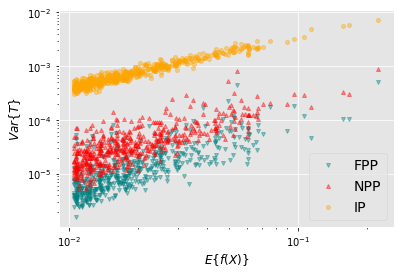

In [31]:
plt.clf()
plt.errorbar([efx[x] for x in X], [FPP_var[x] for x in X], linestyle='', marker='v', markersize=4, color='teal', label='FPP', alpha=0.4)
plt.errorbar([efx[x] for x in X], [NPP_var[x] for x in X], linestyle='', marker='^', markersize=4, color='red', label='NPP', alpha=0.4)
plt.errorbar([efx[x] for x in X], [IP_var[x] for x in X], linestyle='', marker='o', markersize=4, color='orange', label='IP', alpha=0.4)

plt.xlabel("$E\{f(X)\}$")
plt.ylabel("$Var\{T\}$")
plt.xscale('log')
plt.yscale('log')
#plt.ylim([-0.001, 0.03])
plt.legend(prop={'size': 14})
plt.savefig("Plots/nonzero_variance.pdf", bbox_inches='tight')
plt.show()

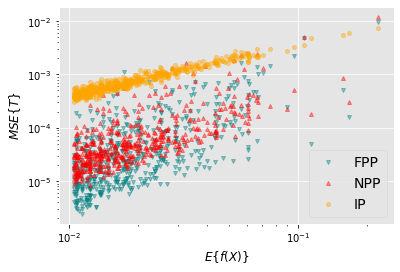

In [32]:
plt.clf()
plt.errorbar([efx[x] for x in X], [FPP_bias[x]**2 + FPP_var[x] for x in X], linestyle='', marker='v', markersize=4, color='teal', label='FPP', alpha=0.4)
plt.errorbar([efx[x] for x in X], [NPP_bias[x]**2 + NPP_var[x] for x in X], linestyle='', marker='^', markersize=4, color='red', label='NPP', alpha=0.4)
plt.errorbar([efx[x] for x in X], [IP_bias[x]**2 + IP_var[x] for x in X], linestyle='', marker='o', markersize=4, color='orange', label='IP', alpha=0.4)

plt.xlabel("$E\{f(X)\}$")
plt.ylabel("$MSE\{T\}$")
plt.xscale('log')
plt.yscale('log')
#plt.ylim([-0.001, 0.03])
plt.legend(prop={'size': 14})
plt.savefig("Plots/nonzero_MSE.pdf", bbox_inches='tight')
plt.show()

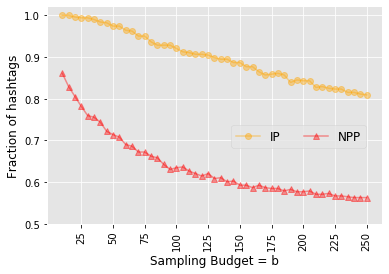

In [35]:
X = []
Y_IP = []
Y_NPP = []
for b in range(10, 255, 5):
    X.append(b)
    Y_IP.append(1 - float(len(worse_than_IP[b])) / float(len(important_hashtags)))
    Y_NPP.append(1 - float(len(worse_than_NPP[b])) / float(len(important_hashtags)))

plt.clf()
plt.plot(X, Y_IP, linestyle='-', marker='o', markersize=6, color='orange', label='IP', alpha=0.4)
plt.plot(X, Y_NPP, linestyle='-', marker='^', markersize=6, color='red', label='NPP', alpha=0.4)

plt.xlabel("Sampling Budget = b")
plt.ylabel("Fraction of hashtags")
plt.legend(prop={'size': 12}, ncol=2, loc=(0.55, 0.35))
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks([25, 50, 75, 100, 125, 150, 175, 200, 225, 250], rotation=90)
plt.savefig("Plots/FPP_better.pdf", bbox_inches='tight')
plt.show()

# Appendix

In [18]:
# Extracting the ranking of hashtags based on global bias
global_bias_ranking = sorted(global_bias.items(), key=lambda k:k[1], reverse=True)


rank_hashtag_global_bias = []
rank_local_bias = []
rank_global_bias = []

# Top-20
for ind in range(20):
    hsh = global_bias_ranking[ind][0]
    rank_hashtag_global_bias.append(hsh)
    rank_local_bias.append(local_bias[hsh])
    rank_global_bias.append(global_bias[hsh])
    
    
rank_hashtag_global_bias.append('...')
rank_local_bias.append(0)
rank_global_bias.append(0)

# Last-10
for ind in range(10):
    rind = len(global_bias_ranking) - 10 + ind
    hsh = global_bias_ranking[rind][0]
    rank_hashtag_global_bias.append(hsh)
    rank_local_bias.append(local_bias[hsh])
    rank_global_bias.append(global_bias[hsh])

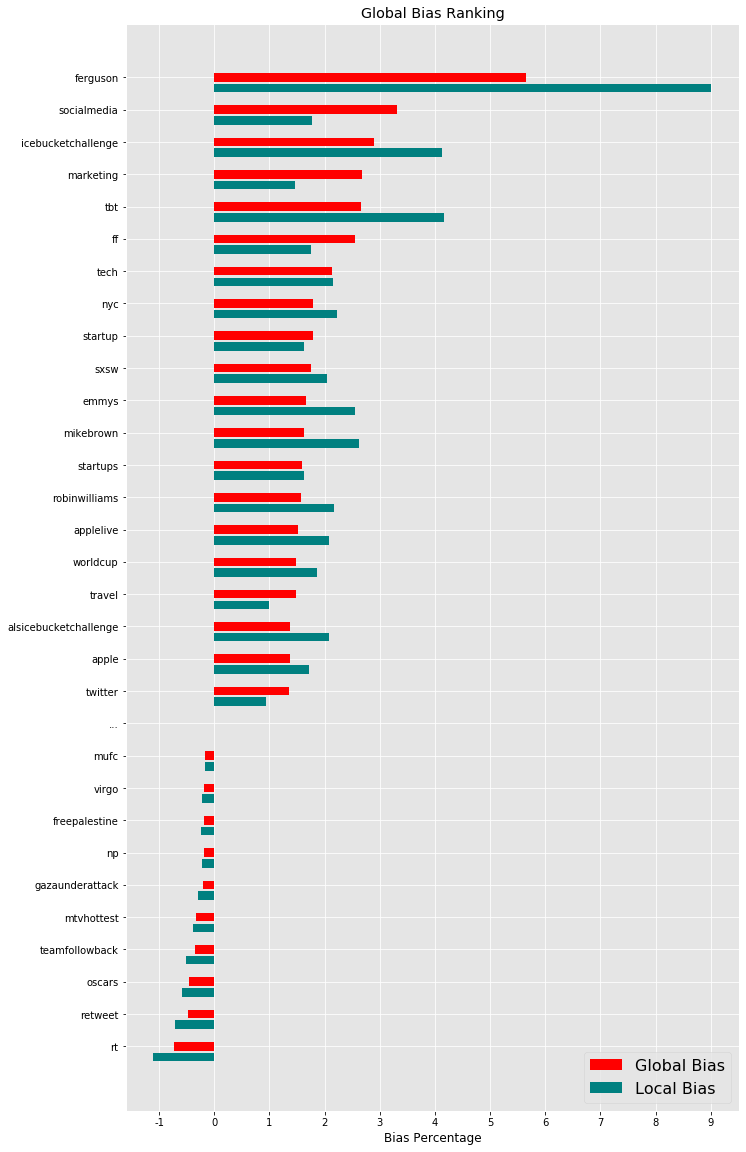

In [19]:
fig, ax = plt.subplots()

y_pos_local = np.arange(1, 3 * len(rank_hashtag_global_bias) + 1, 3)
y_pos_global = y_pos_local - 1.0

ax.barh(y_pos_global, rank_global_bias, align='center', color='red', ecolor='black', label='Global Bias')
ax.barh(y_pos_local, rank_local_bias, align='center', color='teal', ecolor='black', label='Local Bias')

ax.set_yticks(y_pos_global)
ax.set_xticks(np.arange(-0.01, 0.10, 0.01))

ax.set_yticklabels(rank_hashtag_global_bias)
ax.set_xticklabels(np.arange(-1, 10))
ax.set_xlabel('Bias Percentage')

ax.invert_yaxis()

ax.set_title('Global Bias Ranking')
fig.set_size_inches(11,20)
plt.legend(loc=4, prop={'size': 16})
plt.savefig('Plots/global_bias_ranking.pdf', bbox_inches='tight')
plt.show()